In [1]:
#pip install factor-analyzer

  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.0-py3-none-any.whl size=41441 sha256=c6baf441d9e06dc4fcbc942dd51202970950f056d35c79da7ddd09fd3882ecae
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\00\cf\ea\83feab47e1d682730be5935c52a2647f49adfb393e948d4bf5
Successfully built factor-analyzer
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore
from factor_analyzer import FactorAnalyzer

import warnings
warnings.filterwarnings("ignore")

In [4]:
players = pd.read_csv('cricket players india.csv')

In [5]:
players.head()

,Player Name,Total_Runs_Scored,Avg_Runs_Scored,Max_Runs_Scored,Total_Minutes_Batted,Total_Balls_Faced,Total_50s,Total_Boundary_4s,Total_Boundary_6s,Num_matches_Batted,Avg_Overs_Bowled,Avg_Runs_Conceded,Avg_Maiden_Overs
0,RG Sharma,9115,42.004608,264,14250,10250,43,817,244,217,2.592105,13.552632,0.052632
1,V Sehwag,7975,34.227468,219,11250,7629,37,1092,130,233,5.014286,26.178571,0.092857
2,SR Tendulkar,8527,43.505102,200,15195,9868,46,1019,71,196,4.830233,26.604651,0.069767
3,MS Dhoni,10599,36.051020,183,17361,12164,73,809,222,294,3.000000,15.500000,0.000000
4,V Kohli,11867,49.652720,183,17747,12726,58,1116,121,239,2.202083,13.854167,0.020833


In [6]:
players.shape

(122, 13)

In [8]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Player Name           122 non-null    object 
 1   Total_Runs_Scored     122 non-null    int64  
 2   Avg_Runs_Scored       122 non-null    float64
 3   Max_Runs_Scored       122 non-null    int64  
 4   Total_Minutes_Batted  122 non-null    int64  
 5   Total_Balls_Faced     122 non-null    int64  
 6   Total_50s             122 non-null    int64  
 7   Total_Boundary_4s     122 non-null    int64  
 8   Total_Boundary_6s     122 non-null    int64  
 9   Num_matches_Batted    122 non-null    int64  
 10  Avg_Overs_Bowled      122 non-null    float64
 11  Avg_Runs_Conceded     122 non-null    float64
 12  Avg_Maiden_Overs      122 non-null    float64
dtypes: float64(4), int64(8), object(1)
memory usage: 12.5+ KB


In [9]:
players.describe().T

,count,mean,std,min,25%,50%,75%,max
Total_Runs_Scored,122.0,971.811475,2283.940933,0.0,16.000000,74.500000,602.500000,11867.000000
Avg_Runs_Scored,122.0,14.721631,12.944696,0.0,3.952652,11.032787,22.809524,55.000000
Max_Runs_Scored,122.0,49.877049,53.472875,0.0,10.250000,27.000000,78.500000,264.000000
Total_Minutes_Batted,122.0,1634.680328,3694.634263,0.0,36.000000,186.500000,1027.250000,17747.000000
Total_Balls_Faced,122.0,1142.967213,2586.912391,0.0,23.500000,122.000000,710.500000,12726.000000
Total_50s,122.0,5.311475,13.536044,0.0,0.000000,0.000000,1.000000,73.000000
Total_Boundary_4s,122.0,94.803279,230.738543,0.0,1.250000,7.000000,52.250000,1116.000000
Total_Boundary_6s,122.0,14.844262,39.061515,0.0,0.000000,1.000000,7.750000,244.000000
Num_matches_Batted,122.0,35.106557,60.807623,0.0,2.000000,9.500000,33.750000,294.000000
Avg_Overs_Bowled,122.0,5.134385,3.564121,0.0,1.000000,6.375000,8.206386,10.000000


# EDA

<AxesSubplot:xlabel='Avg_Runs_Scored'>

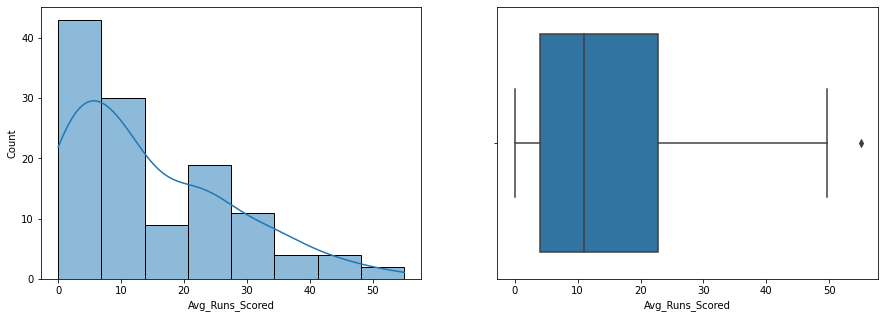

In [13]:
fig, axis = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
sns.histplot(x='Avg_Runs_Scored', data= players, kde= True, ax=axis[0])
sns.boxplot(x='Avg_Runs_Scored', data= players, ax=axis[1])

<AxesSubplot:xlabel='Avg_Runs_Conceded'>

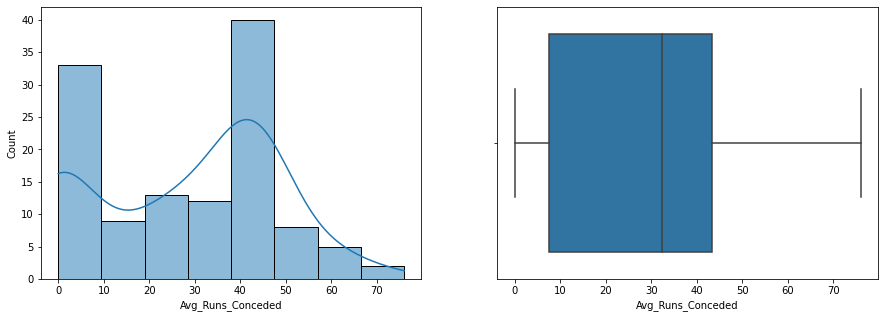

In [14]:
fig, axis = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
sns.histplot(x='Avg_Runs_Conceded', data= players, kde= True, ax=axis[0])
sns.boxplot(x='Avg_Runs_Conceded', data= players, ax=axis[1])

In [15]:
players.sort_values('Total_Runs_Scored',ascending=False).head(10)[['Player Name','Total_Runs_Scored']]

,Player Name,Total_Runs_Scored
4,V Kohli,11867
3,MS Dhoni,10599
0,RG Sharma,9115
2,SR Tendulkar,8527
7,Yuvraj Singh,8349
1,V Sehwag,7975
18,R Dravid,6318
8,S Dhawan,5688
14,SK Raina,5615
6,G Gambhir,5238


In [16]:
players.sort_values('Avg_Runs_Scored',ascending=False).head(10)[['Player Name','Avg_Runs_Scored']]

,Player Name,Avg_Runs_Scored
40,FY Fazal,55.000000
4,V Kohli,49.652720
21,SS Iyer,46.750000
2,SR Tendulkar,43.505102
8,S Dhawan,42.766917
0,RG Sharma,42.004608
15,KL Rahul,39.967742
6,G Gambhir,36.629371
3,MS Dhoni,36.051020
53,JJ Martin,36.000000


In [17]:
players.sort_values('Total_50s',ascending=False).head(10)[['Player Name','Total_50s']]

,Player Name,Total_50s
3,MS Dhoni,73
4,V Kohli,58
18,R Dravid,53
7,Yuvraj Singh,51
2,SR Tendulkar,46
0,RG Sharma,43
1,V Sehwag,37
10,SC Ganguly,36
14,SK Raina,36
6,G Gambhir,34


In [18]:
players.sort_values('Total_Boundary_6s',ascending=False).head(10)[['Player Name','Total_Boundary_6s']]

,Player Name,Total_Boundary_6s
0,RG Sharma,244
3,MS Dhoni,222
7,Yuvraj Singh,150
1,V Sehwag,130
4,V Kohli,121
14,SK Raina,120
10,SC Ganguly,101
2,SR Tendulkar,71
8,S Dhawan,69
12,YK Pathan,43


In [19]:
players.sort_values('Total_Boundary_4s',ascending=False).head(10)[['Player Name','Total_Boundary_4s']]

,Player Name,Total_Boundary_4s
4,V Kohli,1116
1,V Sehwag,1092
2,SR Tendulkar,1019
7,Yuvraj Singh,867
0,RG Sharma,817
3,MS Dhoni,809
8,S Dhawan,710
18,R Dravid,562
6,G Gambhir,561
10,SC Ganguly,480


In [21]:
lstNumeric = list(players.select_dtypes(exclude='object').columns)
lstNumeric

['Total_Runs_Scored',
 'Avg_Runs_Scored',
 'Max_Runs_Scored',
 'Total_Minutes_Batted',
 'Total_Balls_Faced',
 'Total_50s',
 'Total_Boundary_4s',
 'Total_Boundary_6s',
 'Num_matches_Batted',
 'Avg_Overs_Bowled',
 'Avg_Runs_Conceded',
 'Avg_Maiden_Overs']

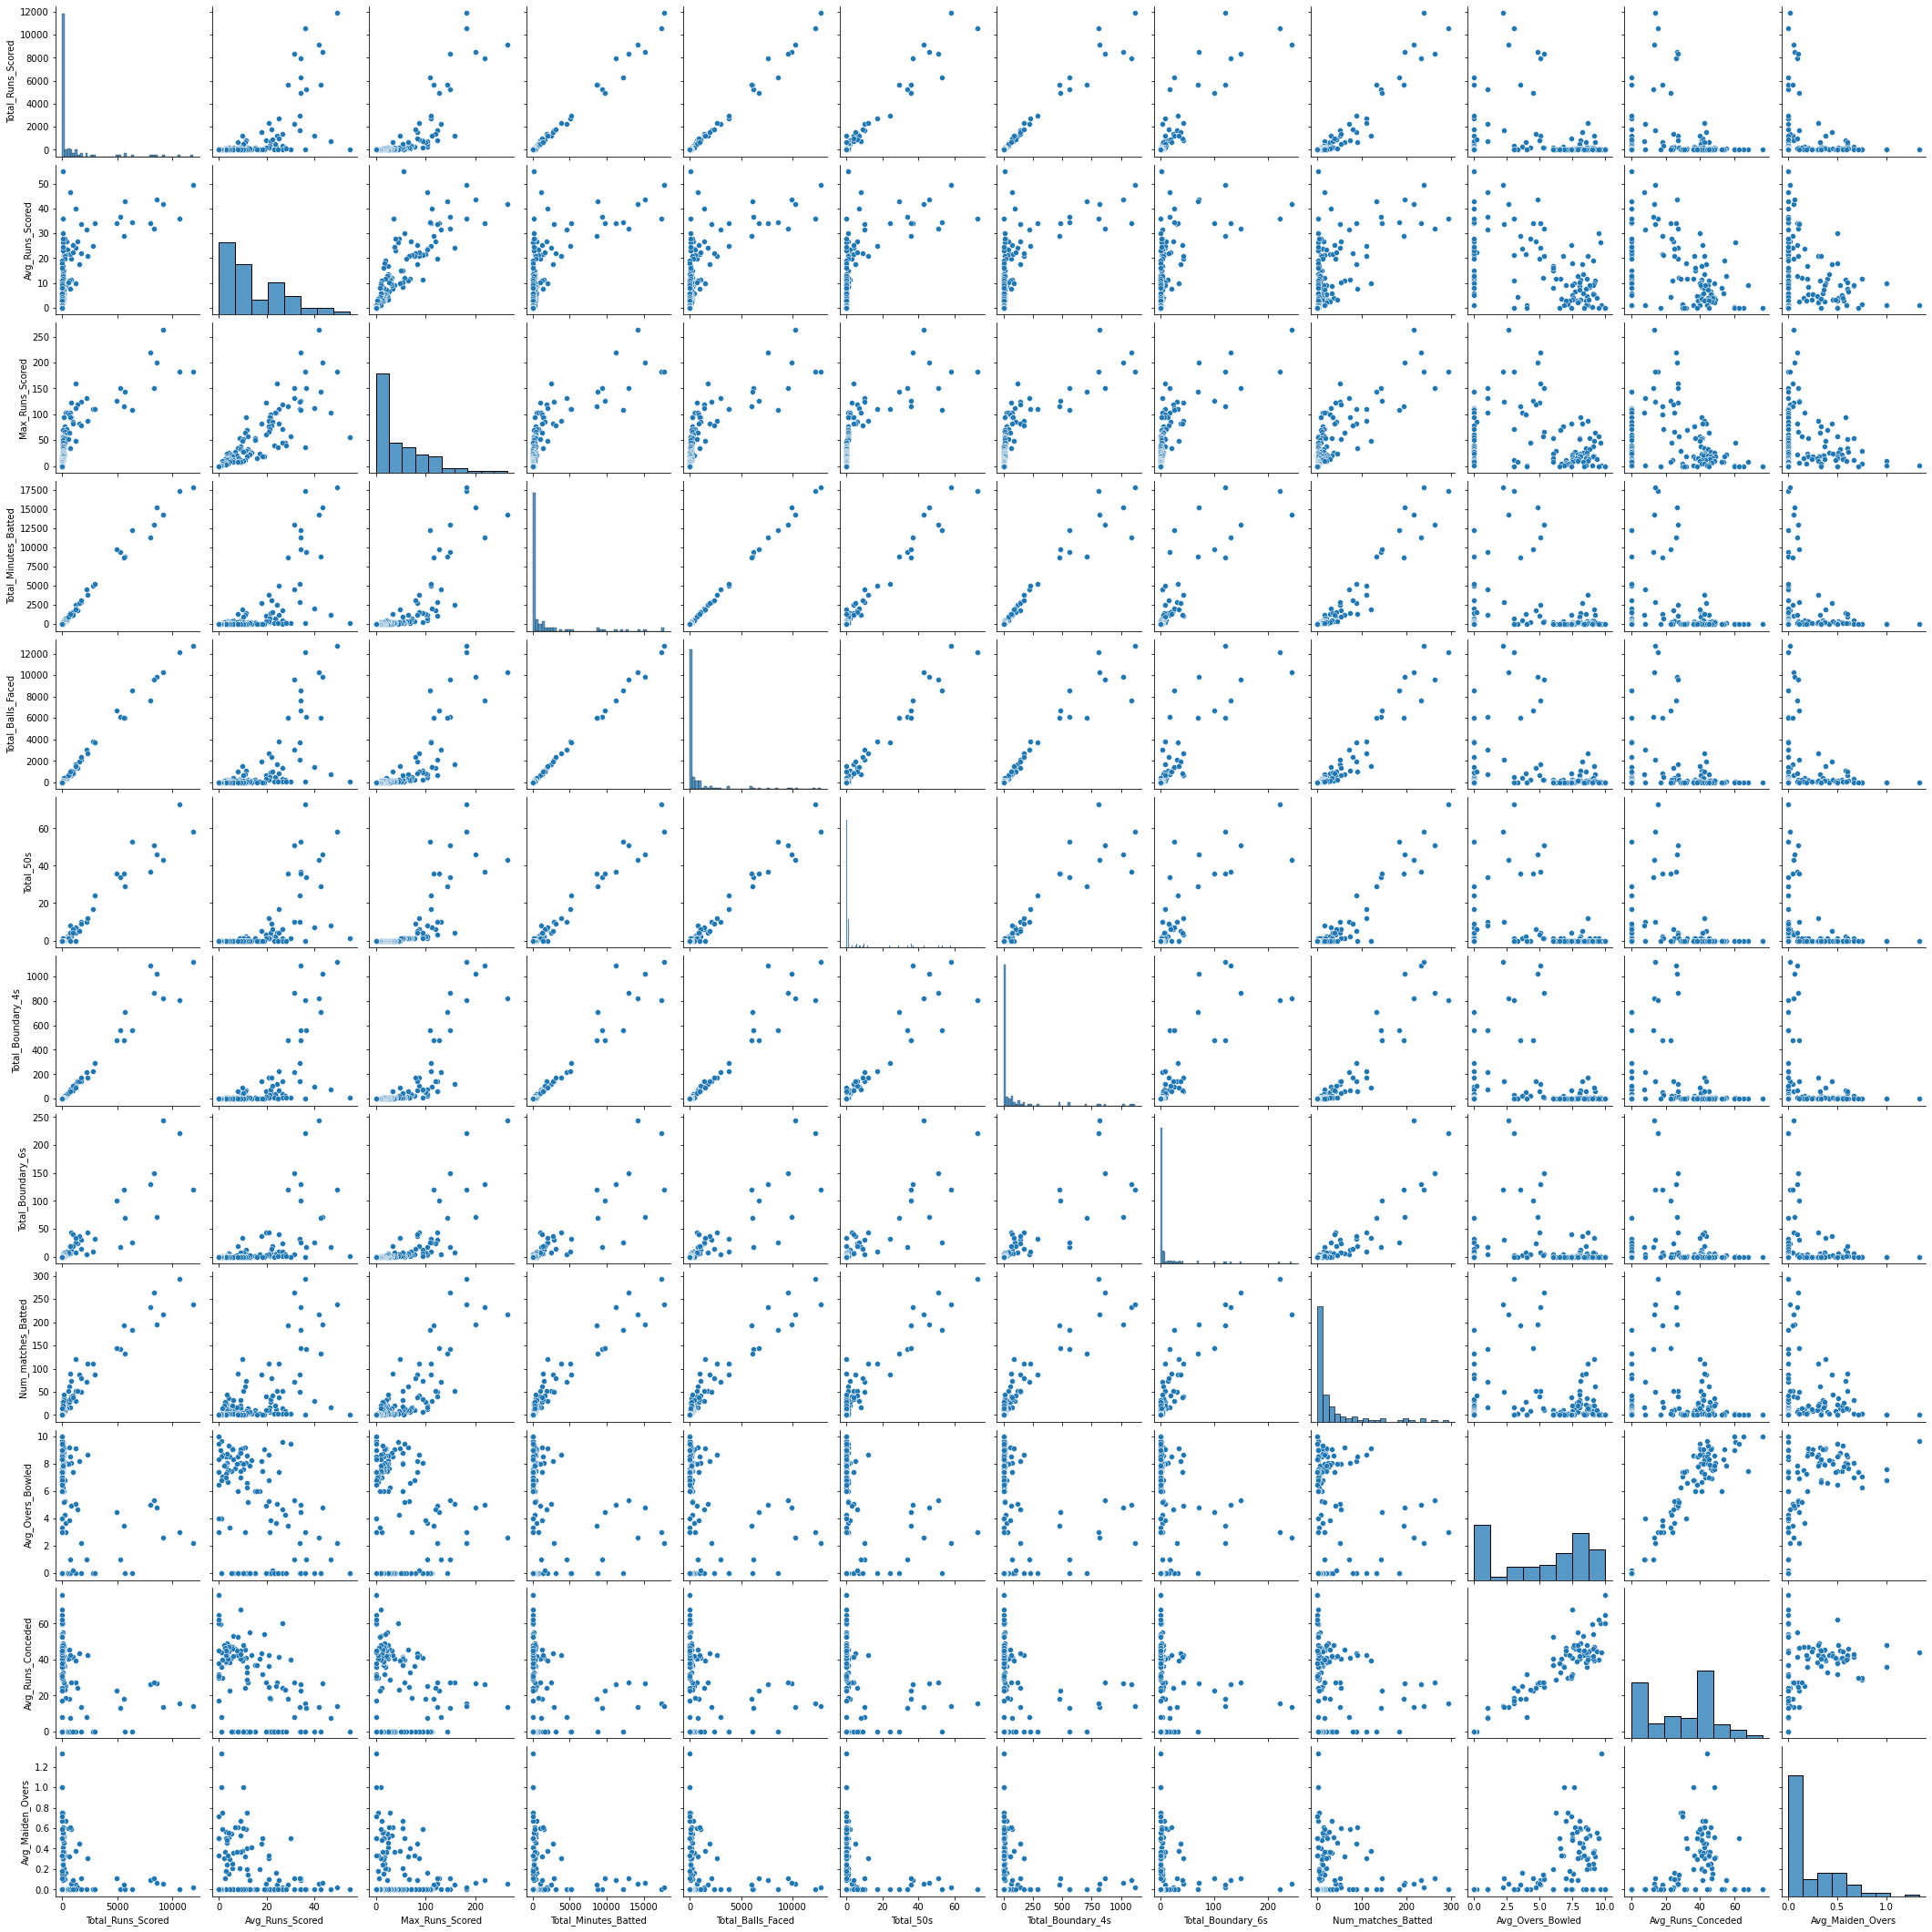

In [22]:
sns.pairplot(vars= lstNumeric, data= players)

In [25]:
cov = players[lstNumeric].cov()
cov

,Total_Runs_Scored,Avg_Runs_Scored,Max_Runs_Scored,Total_Minutes_Batted,Total_Balls_Faced,Total_50s,Total_Boundary_4s,Total_Boundary_6s,Num_matches_Batted,Avg_Overs_Bowled,Avg_Runs_Conceded,Avg_Maiden_Overs
Total_Runs_Scored,5.216386e+06,18972.171416,99276.265885,8.393596e+06,5.880429e+06,30199.811272,517276.681615,79434.375356,132769.904552,-1846.627724,-10573.712203,-126.306852
Avg_Runs_Scored,1.897217e+04,167.565154,568.977087,3.081356e+04,2.156207e+04,110.901451,1903.469197,274.972635,458.745915,-23.961353,-133.133284,-1.371678
Max_Runs_Scored,9.927627e+04,568.977087,2859.348395,1.604001e+05,1.121641e+05,555.989026,9999.314456,1576.600528,2618.128912,-68.302701,-404.792066,-4.058151
Total_Minutes_Batted,8.393596e+06,30813.557274,160400.100867,1.365032e+07,9.548782e+06,49242.125186,829273.316759,125419.404349,214815.902114,-3084.938735,-17660.428211,-205.009746
Total_Balls_Faced,5.880429e+06,21562.067281,112164.078580,9.548782e+06,6.692116e+06,34491.721041,578712.357133,88517.589893,150728.425010,-2185.556109,-12545.654834,-144.084354
Total_50s,3.019981e+04,110.901451,555.989026,4.924213e+04,3.449172e+04,183.224495,2945.747731,453.610893,770.966536,-12.262954,-68.599946,-0.808220
Total_Boundary_4s,5.172767e+05,1903.469197,9999.314456,8.292733e+05,5.787124e+05,2945.747731,53240.275030,7616.861672,13081.913697,-182.318011,-1035.767138,-12.617828
Total_Boundary_6s,7.943438e+04,274.972635,1576.600528,1.254194e+05,8.851759e+04,453.610893,7616.861672,1525.801992,2088.363840,-19.573514,-123.300651,-1.655006
Num_matches_Batted,1.327699e+05,458.745915,2618.128912,2.148159e+05,1.507284e+05,770.966536,13081.913697,2088.363840,3697.567064,-32.281515,-217.450017,-2.116669
Avg_Overs_Bowled,-1.846628e+03,-23.961353,-68.302701,-3.084939e+03,-2.185556e+03,-12.262954,-182.318011,-19.573514,-32.281515,12.702956,68.467480,0.559793


In [26]:
cov_scaled = players[lstNumeric].apply(zscore).cov()
cov_scaled

,Total_Runs_Scored,Avg_Runs_Scored,Max_Runs_Scored,Total_Minutes_Batted,Total_Balls_Faced,Total_50s,Total_Boundary_4s,Total_Boundary_6s,Num_matches_Batted,Avg_Overs_Bowled,Avg_Runs_Conceded,Avg_Maiden_Overs
Total_Runs_Scored,1.008264,0.647016,0.819599,1.002920,1.003499,0.984922,0.989674,0.897737,0.963898,-0.228727,-0.231349,-0.207264
Avg_Runs_Scored,0.647016,1.008264,0.828789,0.649610,0.649219,0.638158,0.642552,0.548306,0.587620,-0.523651,-0.513948,-0.397138
Max_Runs_Scored,0.819599,0.828789,1.008264,0.818604,0.817548,0.774489,0.817130,0.761051,0.811846,-0.361349,-0.378288,-0.284430
Total_Minutes_Batted,1.002920,0.649610,0.818604,1.008264,1.007324,0.992769,0.980800,0.876231,0.964076,-0.236209,-0.238866,-0.207962
Total_Balls_Faced,1.003499,0.649219,0.817548,1.007324,1.008264,0.993152,0.977542,0.883229,0.966117,-0.239002,-0.242346,-0.208745
Total_50s,0.984922,0.638158,0.774489,0.992769,0.993152,1.008264,0.950951,0.865002,0.944409,-0.256286,-0.253254,-0.223779
Total_Boundary_4s,0.989674,0.642552,0.817130,0.980800,0.977542,0.950951,1.008264,0.852082,0.940086,-0.223528,-0.224319,-0.204949
Total_Boundary_6s,0.897737,0.548306,0.761051,0.876231,0.883229,0.865002,0.852082,1.008264,0.886489,-0.141756,-0.157740,-0.158793
Num_matches_Batted,0.963898,0.587620,0.811846,0.964076,0.966117,0.944409,0.940086,0.886489,1.008264,-0.150182,-0.178701,-0.130460
Avg_Overs_Bowled,-0.228727,-0.523651,-0.361349,-0.236209,-0.239002,-0.256286,-0.223528,-0.141756,-0.150182,1.008264,0.959967,0.588649


In [27]:
cor = players[lstNumeric].corr()
cor

,Total_Runs_Scored,Avg_Runs_Scored,Max_Runs_Scored,Total_Minutes_Batted,Total_Balls_Faced,Total_50s,Total_Boundary_4s,Total_Boundary_6s,Num_matches_Batted,Avg_Overs_Bowled,Avg_Runs_Conceded,Avg_Maiden_Overs
Total_Runs_Scored,1.000000,0.641712,0.812881,0.994699,0.995273,0.976849,0.981562,0.890378,0.955997,-0.226852,-0.229452,-0.205565
Avg_Runs_Scored,0.641712,1.000000,0.821995,0.644286,0.643898,0.632927,0.637285,0.543812,0.582804,-0.519358,-0.509735,-0.393883
Max_Runs_Scored,0.812881,0.821995,1.000000,0.811895,0.810846,0.768141,0.810432,0.754812,0.805192,-0.358387,-0.375188,-0.282099
Total_Minutes_Batted,0.994699,0.644286,0.811895,1.000000,0.999067,0.984631,0.972761,0.869049,0.956174,-0.234273,-0.236908,-0.206258
Total_Balls_Faced,0.995273,0.643898,0.810846,0.999067,1.000000,0.985012,0.969529,0.875989,0.958198,-0.237043,-0.240360,-0.207034
Total_50s,0.976849,0.632927,0.768141,0.984631,0.985012,1.000000,0.943156,0.857912,0.936668,-0.254186,-0.251178,-0.221945
Total_Boundary_4s,0.981562,0.637285,0.810432,0.972761,0.969529,0.943156,1.000000,0.845098,0.932380,-0.221696,-0.222481,-0.203269
Total_Boundary_6s,0.890378,0.543812,0.754812,0.869049,0.875989,0.857912,0.845098,1.000000,0.879223,-0.140594,-0.156447,-0.157492
Num_matches_Batted,0.955997,0.582804,0.805192,0.956174,0.958198,0.936668,0.932380,0.879223,1.000000,-0.148951,-0.177236,-0.129390
Avg_Overs_Bowled,-0.226852,-0.519358,-0.358387,-0.234273,-0.237043,-0.254186,-0.221696,-0.140594,-0.148951,1.000000,0.952099,0.583824


<AxesSubplot:>

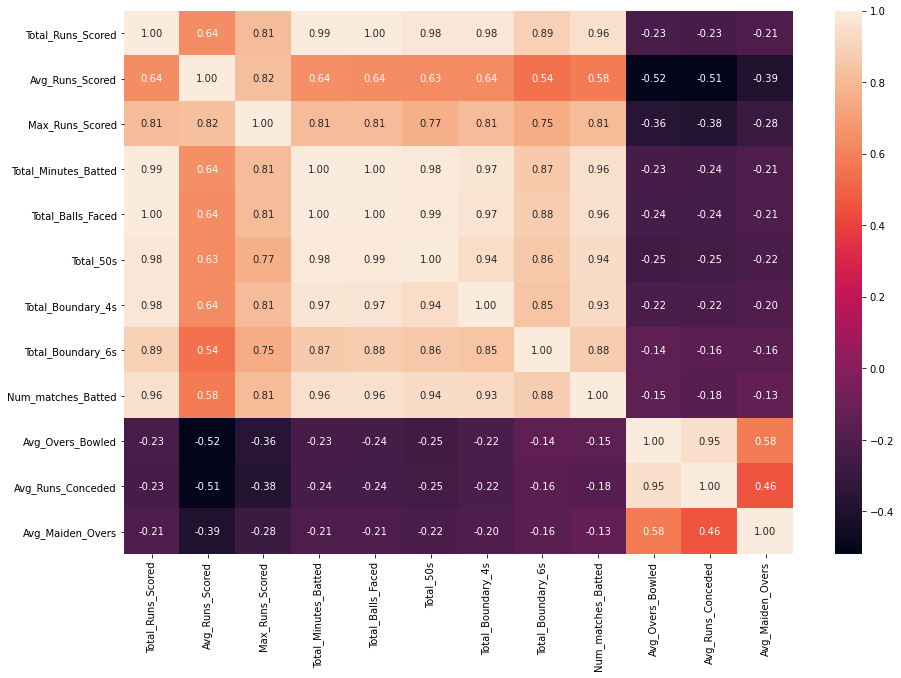

In [34]:
plt.subplots(figsize=(15,10))
sns.heatmap(cor,annot=True,fmt='.2f')

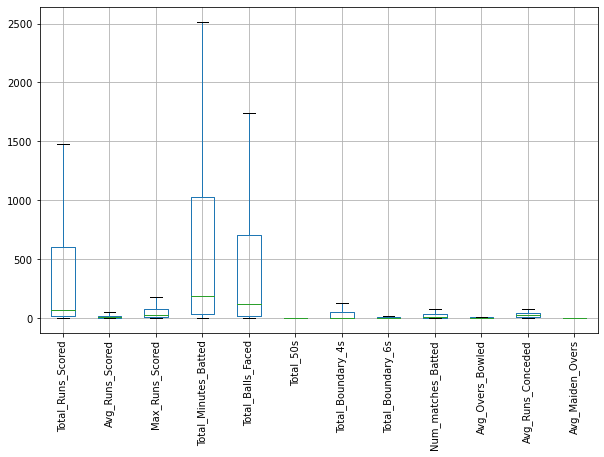

In [39]:
players.boxplot(figsize=(10,6))
plt.xticks(rotation=90)
plt.show()

In [36]:
def detect_outliers(x):
    q25 = np.percentile(x,25)
    q75 = np.percentile(x,75)
    IQR = q75 - q25
    lower_bound = q25 - (1.5 * IQR)
    upper_bound = q75 + (1.5 * IQR)
    return upper_bound,lower_bound

In [37]:
for i in lstNumeric:
    uvw,lvw = detect_outliers(players[i])
    players[i] = np.where(players[i] > uvw, uvw,players[i])
    players[i] = np.where(players[i] < lvw, lvw,players[i])

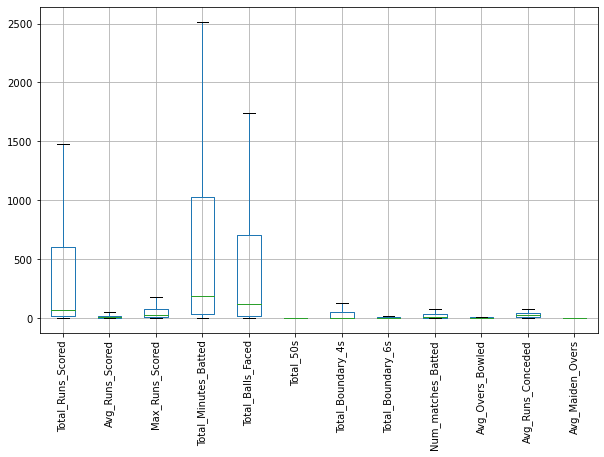

In [40]:
players.boxplot(figsize=(10,6))
plt.xticks(rotation=90)
plt.show()

In [41]:
players_df = players.drop(['Player Name'],axis= True)

In [42]:
players_df.shape

(122, 12)

In [43]:
players_df_scalled = players_df.apply(zscore)
players_df_scalled

,Total_Runs_Scored,Avg_Runs_Scored,Max_Runs_Scored,Total_Minutes_Batted,Total_Balls_Faced,Total_50s,Total_Boundary_4s,Total_Boundary_6s,Num_matches_Batted,Avg_Overs_Bowled,Avg_Runs_Conceded,Avg_Maiden_Overs
0,2.041210,2.134654,2.669256,2.053891,2.042344,1.736333,2.023294,1.955022,2.033259,-0.716239,-0.734600,-0.578243
1,2.041210,1.526874,2.669256,2.053891,2.042344,1.736333,2.023294,1.955022,2.033259,-0.033836,-0.106251,-0.418884
2,2.041210,2.251917,2.669256,2.053891,2.042344,1.736333,2.023294,1.955022,2.033259,-0.085689,-0.085046,-0.510357
3,2.041210,1.669384,2.669256,2.053891,2.042344,1.736333,2.023294,1.955022,2.033259,-0.601323,-0.637686,-0.786751
4,2.041210,2.732351,2.669256,2.053891,2.042344,1.736333,2.023294,1.955022,2.033259,-0.826121,-0.719594,-0.704217
...,...,...,...,...,...,...,...,...,...,...,...,...
117,-0.691523,-1.147987,-0.983258,-0.723855,-0.719469,-0.704135,-0.688791,-0.688298,-0.807245,1.370795,1.576924,-0.786751
118,-0.691523,-1.147987,-0.983258,-0.723855,-0.719469,-0.704135,-0.688791,-0.688298,-0.807245,0.384736,0.482061,1.194075
119,-0.691523,-1.147987,-0.983258,-0.723855,-0.719469,-0.704135,-0.688791,-0.688298,-0.807245,1.370795,1.825757,-0.786751
120,-0.691523,-1.147987,-0.983258,-0.723855,-0.719469,-0.704135,-0.688791,-0.688298,-0.807245,1.229930,1.701340,1.194075


In [44]:
players_df_scalled.describe().T

,count,mean,std,min,25%,50%,75%,max
Total_Runs_Scored,122.0,1.019221e-16,1.004124,-0.691523,-0.662025,-0.554172,0.419269,2.041210
Avg_Runs_Scored,122.0,-3.348869e-16,1.004124,-1.147987,-0.839089,-0.285780,0.634567,2.845051
Max_Runs_Scored,122.0,-1.528832e-16,1.004124,-0.983258,-0.776273,-0.438031,0.601938,2.669256
Total_Minutes_Batted,122.0,3.294268e-16,1.004124,-0.723855,-0.684080,-0.517799,0.411108,2.053891
Total_Balls_Faced,122.0,-1.274026e-17,1.004124,-0.719469,-0.682190,-0.525936,0.407624,2.042344
Total_50s,122.0,1.983841e-16,1.004124,-0.704135,-0.704135,-0.704135,0.272052,1.736333
Total_Boundary_4s,122.0,2.002042e-17,1.004124,-0.688791,-0.662460,-0.541338,0.411842,2.023294
Total_Boundary_6s,122.0,4.604695e-16,1.004124,-0.688298,-0.688298,-0.551868,0.369030,1.955022
Num_matches_Batted,122.0,-2.912060e-16,1.004124,-0.807245,-0.737432,-0.475635,0.370844,2.033259
Avg_Overs_Bowled,122.0,-1.237626e-16,1.004124,-1.446516,-1.164785,0.349520,0.865478,1.370795


In [45]:
from sklearn.decomposition import PCA

In [47]:
pca = PCA(n_components=12,random_state=123)
pca_score = pca.fit_transform(players_df_scalled)
pca_score #eigen vectors

array([[ 6.31748458e+00,  1.97618044e-01, -1.05468309e-01, ...,
         3.95400427e-02, -4.64775886e-03,  2.24327168e-02],
       [ 5.93334534e+00,  1.12109577e+00, -4.06688746e-01, ...,
         5.03037540e-02, -3.41597480e-03,  2.27520267e-02],
       [ 6.15070093e+00,  9.27527020e-01, -5.37273532e-01, ...,
         4.03502528e-02,  7.46565136e-04,  1.89851482e-02],
       ...,
       [-2.68558291e+00,  1.03726148e+00, -1.79487469e+00, ...,
         6.22212035e-04,  2.97696193e-03, -1.06810269e-02],
       [-2.86490630e+00,  1.79261300e+00, -6.27811245e-02, ...,
         1.27555653e-03, -1.13300966e-02, -1.00881041e-02],
       [-2.76932257e+00,  1.33459050e+00, -2.05315140e+00, ...,
        -1.19265753e-02,  2.37977677e-03, -1.57384129e-02]])

In [49]:
components = pca.components_  #weight
components

array([[ 3.38815695e-01,  2.79786953e-01,  3.25129655e-01,
         3.36818561e-01,  3.36918547e-01,  3.26160233e-01,
         3.39247477e-01,  3.17262964e-01,  3.08014983e-01,
        -1.47051473e-01, -1.52968227e-01, -1.10595039e-01],
       [ 1.12601884e-01, -1.83519896e-01, -7.29251007e-03,
         1.21740933e-01,  1.19118889e-01,  1.83396049e-02,
         9.87076077e-02,  1.41324875e-01,  2.25538835e-01,
         5.83009051e-01,  5.43134425e-01,  4.56906272e-01],
       [-7.27581203e-03, -8.16576004e-02, -5.04001995e-02,
         1.36914740e-02,  1.52078837e-02, -4.75704803e-02,
        -4.75773876e-03, -7.54003341e-03,  9.91344699e-02,
        -2.72471593e-01, -4.71797109e-01,  8.25419178e-01],
       [-1.39397940e-01,  7.34071656e-01,  3.67166756e-01,
        -1.68824345e-01, -1.68415543e-01,  1.71073352e-01,
        -1.32381785e-01, -3.20748181e-02, -3.04988314e-01,
         1.44215580e-01,  1.30307070e-01,  2.67234685e-01],
       [ 1.31221955e-02,  4.37787231e-01, -3.2685695

In [50]:
pca.explained_variance_ #eigen values

array([8.39356365e+00, 2.21911682e+00, 6.02358969e-01, 4.26168643e-01,
       1.59597225e-01, 1.36663850e-01, 7.92659487e-02, 3.80168202e-02,
       3.38089980e-02, 6.73784290e-03, 3.11456581e-03, 7.60223059e-04])

In [51]:
pca.explained_variance_ratio_ #percentage of varience in PCA components

array([6.93730329e-01, 1.83410611e-01, 4.97851333e-02, 3.52229548e-02,
       1.31907542e-02, 1.12953045e-02, 6.55135231e-03, 3.14210058e-03,
       2.79432292e-03, 5.56884557e-04, 2.57419715e-04, 6.28326435e-05])

In [52]:
var_exp = pca.explained_variance_ratio_

In [53]:
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([0.69373033, 0.87714094, 0.92692607, 0.96214903, 0.97533978,
       0.98663509, 0.99318644, 0.99632854, 0.99912286, 0.99967975,
       0.99993717, 1.        ])

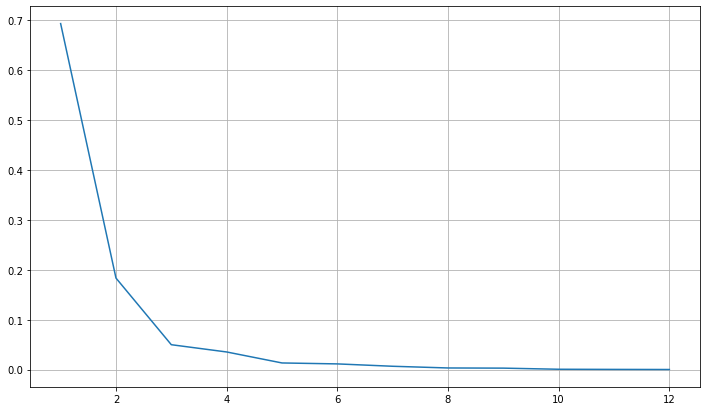

In [54]:
plt.subplots(figsize=(12,7))
sns.lineplot(y = var_exp, x=range(1,len(var_exp)+1),markers='O')
plt.grid()
plt.show()

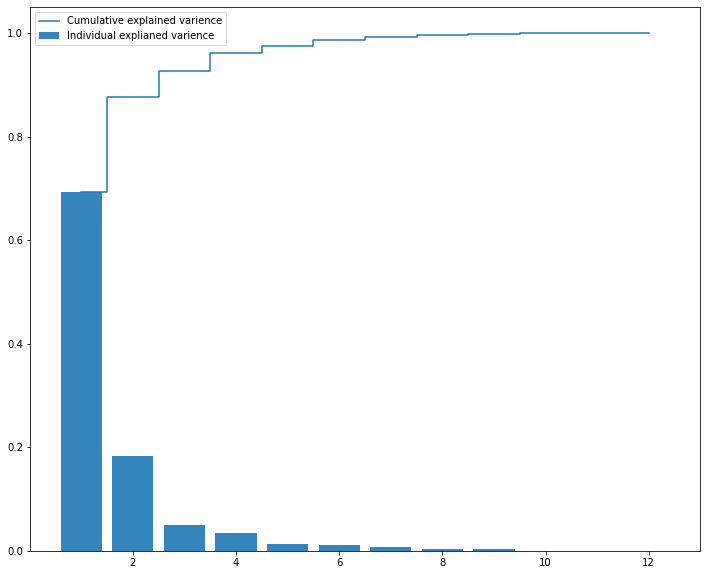

In [59]:
plt.subplots(figsize=(12,10))
plt.bar(range(1,len(var_exp)+1),var_exp,alpha=0.9,align='center',label = 'Individual explianed varience')
plt.step(range(1,len(var_exp)+1),cum_var_exp,where='mid', label = 'Cumulative explained varience')
plt.legend(loc = 'best')
plt.show()

In [60]:
pca = PCA(n_components=3,random_state=123)
df_pca = pca.fit_transform(players_df_scalled)
df_pca

array([[ 6.31748458e+00,  1.97618044e-01, -1.05468309e-01],
       [ 5.93334534e+00,  1.12109577e+00, -4.06688746e-01],
       [ 6.15070093e+00,  9.27527020e-01, -5.37273532e-01],
       [ 6.17864461e+00,  3.07370375e-01, -3.16617181e-01],
       [ 6.51250703e+00, -2.55406350e-02, -2.35396243e-01],
       [ 4.52676503e+00,  6.88811906e-01, -5.86118126e-01],
       [ 5.98766979e+00, -1.38248042e-01, -7.42147450e-02],
       [ 5.64907176e+00,  1.26690246e+00, -3.66872553e-01],
       [ 6.31910344e+00, -6.95090468e-01,  2.73299515e-01],
       [ 5.11936609e+00, -5.32496143e-01,  7.13321557e-02],
       [ 5.62092728e+00,  9.81260501e-01, -1.77527051e-01],
       [ 5.41661710e+00,  1.28520360e-01,  1.09177123e-01],
       [ 2.81804496e+00,  3.10361734e-01, -5.55768215e-01],
       [ 4.60728913e+00,  6.00392687e-01, -5.73577900e-01],
       [ 5.53626210e+00,  6.56787235e-01, -1.39031417e-01],
       [ 4.78386900e+00, -1.28916721e+00,  1.39456474e-01],
       [ 5.27205363e+00, -6.35995156e-01

In [61]:
df_pca_loading = pd.DataFrame(pca.components_,columns=list(lstNumeric))
df_pca_loading

,Total_Runs_Scored,Avg_Runs_Scored,Max_Runs_Scored,Total_Minutes_Batted,Total_Balls_Faced,Total_50s,Total_Boundary_4s,Total_Boundary_6s,Num_matches_Batted,Avg_Overs_Bowled,Avg_Runs_Conceded,Avg_Maiden_Overs
0,0.338816,0.279787,0.325130,0.336819,0.336919,0.32616,0.339247,0.317263,0.308015,-0.147051,-0.152968,-0.110595
1,0.112602,-0.183520,-0.007293,0.121741,0.119119,0.01834,0.098708,0.141325,0.225539,0.583009,0.543134,0.456906
2,-0.007276,-0.081658,-0.050400,0.013691,0.015208,-0.04757,-0.004758,-0.007540,0.099134,-0.272472,-0.471797,0.825419


In [62]:
from matplotlib.patches import Rectangle

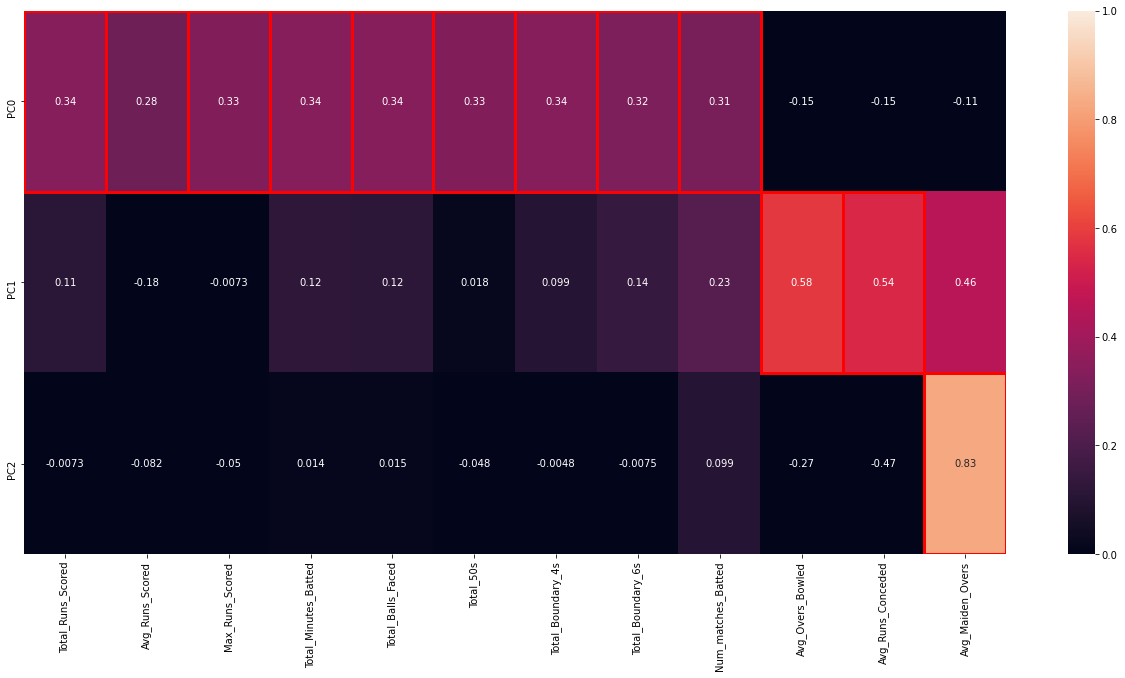

In [66]:
fig,axs = plt.subplots(figsize=(22,10),facecolor='w',edgecolor='k')
ax = sns.heatmap(df_pca_loading,annot=True,vmax=1,vmin=0,cbar='Blue',ax=axs,yticklabels=['PC0','PC1','PC2'])

column_max = df_pca_loading.abs().idxmax(axis=0)
for col, variable in enumerate(df_pca_loading.columns):
    position = df_pca_loading.index.get_loc(column_max[variable])
    ax.add_patch(Rectangle((col, position),1,1, fill=False, edgecolor='red', lw=3))

In [67]:
df_pca = pd.DataFrame(df_pca,columns=['PC0','PC1','PC2'])
df_pca

,PC0,PC1,PC2
0,6.317485,0.197618,-0.105468
1,5.933345,1.121096,-0.406689
2,6.150701,0.927527,-0.537274
3,6.178645,0.307370,-0.316617
4,6.512507,-0.025541,-0.235396
...,...,...,...
117,-2.647519,0.902112,-1.677476
118,-2.554108,0.637625,0.742763
119,-2.685583,1.037261,-1.794875
120,-2.864906,1.792613,-0.062781


In [71]:
df_new = pd.concat([players['Player Name'],df_pca],axis=1)
df_new

,Player Name,PC0,PC1,PC2
0,RG Sharma,6.317485,0.197618,-0.105468
1,V Sehwag,5.933345,1.121096,-0.406689
2,SR Tendulkar,6.150701,0.927527,-0.537274
3,MS Dhoni,6.178645,0.307370,-0.316617
4,V Kohli,6.512507,-0.025541,-0.235396
...,...,...,...,...
117,Parvez Rasool,-2.647519,0.902112,-1.677476
118,MS Gony,-2.554108,0.637625,0.742763
119,Washington Sundar,-2.685583,1.037261,-1.794875
120,KV Sharma,-2.864906,1.792613,-0.062781


In [72]:
df_new.sort_values('PC0',ascending=False)

,Player Name,PC0,PC1,PC2
4,V Kohli,6.512507,-0.025541,-0.235396
8,S Dhawan,6.319103,-0.695090,0.273300
0,RG Sharma,6.317485,0.197618,-0.105468
3,MS Dhoni,6.178645,0.307370,-0.316617
2,SR Tendulkar,6.150701,0.927527,-0.537274
...,...,...,...,...
119,Washington Sundar,-2.685583,1.037261,-1.794875
106,S Tyagi,-2.690126,1.404112,2.152895
121,Mohammed Siraj,-2.769323,1.334590,-2.053151
120,KV Sharma,-2.864906,1.792613,-0.062781


In [73]:
df_new.sort_values(['PC1','PC2'], ascending=False)

,Player Name,PC0,PC1,PC2
28,IK Pathan,4.507935,3.017975,0.306571
54,Z Khan,1.291495,2.825128,1.035738
26,RA Jadeja,4.654742,2.758932,-0.176145
46,Harbhajan Singh,2.549295,2.741553,0.289937
23,AB Agarkar,2.306838,2.542851,0.854003
...,...,...,...,...
50,KK Nair,-0.828615,-2.625790,0.322283
49,PP Shaw,-0.558695,-2.634404,0.289233
52,SS Tiwary,-0.799947,-2.639535,0.312522
53,JJ Martin,-0.606759,-2.830452,0.238353
